In [3]:
import pandas as pd

# File paths
file_path_aisles = "instacart-market-basket-analysis/aisles.csv"
file_path_departments = "instacart-market-basket-analysis/departments.csv"
file_path_order_products_prior = "instacart-market-basket-analysis/order_products__prior.csv"
file_path_order_products_train = "instacart-market-basket-analysis/order_products__train.csv"
file_path_orders = "instacart-market-basket-analysis/orders.csv"
file_path_products = "instacart-market-basket-analysis/products.csv"
file_path_sample_submission = "instacart-market-basket-analysis/sample_submission.csv"

# Load the aisles data
aisles_df = pd.read_csv(file_path_aisles, header=0)

# Load the departments data
departments_df = pd.read_csv(file_path_departments, header=0)

# Load the order_products_prior data
order_products_prior_df = pd.read_csv(file_path_order_products_prior, header=0)

# Load the order_products_train data
order_products_train_df = pd.read_csv(file_path_order_products_train, header=0)

# Load the orders data
orders_df = pd.read_csv(file_path_orders, header=0)

# Load the products data
products_df = pd.read_csv(file_path_products, header=0)

# Load the sample_submission data
sample_submission_df = pd.read_csv(file_path_sample_submission, header=0)

# Display the first few rows of each DataFrame to verify successful loading
print("Aisles DataFrame:")
print(aisles_df.head())

# print("\nDepartments DataFrame:")
# print(departments_df.head())

print("\nOrder Products Prior DataFrame:")
print(order_products_prior_df.head())

# print("\nOrder Products Train DataFrame:")
# print(order_products_train_df.head())

print("\nOrders DataFrame:")
print(orders_df.head())

print("\nProducts DataFrame:")
print(products_df.head())

# print("\nSample Submission DataFrame:")
# print(sample_submission_df.head())


Aisles DataFrame:
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

Order Products Prior DataFrame:
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

Orders DataFrame:
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4    

In [4]:
products_df = pd.merge(products_df, departments_df, on="department_id", how="inner")
joined_products_df = pd.merge(products_df,aisles_df, on = "aisle_id", how = "inner")

print("\nJoined Products DataFrame:")
print(joined_products_df.head())


Joined Products DataFrame:
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id department                       aisle  
0             19     snacks               cookies cakes  
1             13     pantry           spices seasonings  
2              7  beverages                         tea  
3              1     frozen                frozen meals  
4             13     pantry  marinades meat preparation  


In [6]:
shopping_df = pd.merge(joined_products_df,order_products_prior_df, on = "product_id" , how = "inner").sort_values(by='order_id')

print("\nShopping DataFrame:")
print(shopping_df.head())


Shopping DataFrame:
          product_id                              product_name  aisle_id  \
19587656       30035                         Natural Sweetener        17   
10458535       17794                                   Carrots        83   
5460221         9327                             Garlic Powder       104   
29627533       45918                            Coconut Butter        19   
896609          1819  All Natural No Stir Creamy Almond Butter        88   

          department_id department               aisle  order_id  \
19587656             13     pantry  baking ingredients         2   
10458535              4    produce    fresh vegetables         2   
5460221              13     pantry   spices seasonings         2   
29627533             13     pantry       oils vinegars         2   
896609               13     pantry             spreads         2   

          add_to_cart_order  reordered  
19587656                  5          0  
10458535                  6    

In [7]:
aisle_counts = shopping_df.groupby('aisle').size().reset_index(name='count').sort_values(by = "count", ascending=False).head(10)
print(aisle_counts)


                             aisle    count
50                    fresh fruits  3642188
53                fresh vegetables  3418021
98      packaged vegetables fruits  1765313
133                         yogurt  1452343
93                 packaged cheese   979763
83                            milk   891015
131  water seltzer sparkling water   841533
25                  chips pretzels   722470
119                soy lactosefree   638253
11                           bread   584834


/var/folders/v0/302vhr4n5dnbjpj8077_jckw0000gn/T/ipykernel_98705/1937434531.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aisle_counts["count"], y=aisle_counts["aisle"], palette="Blues_r")


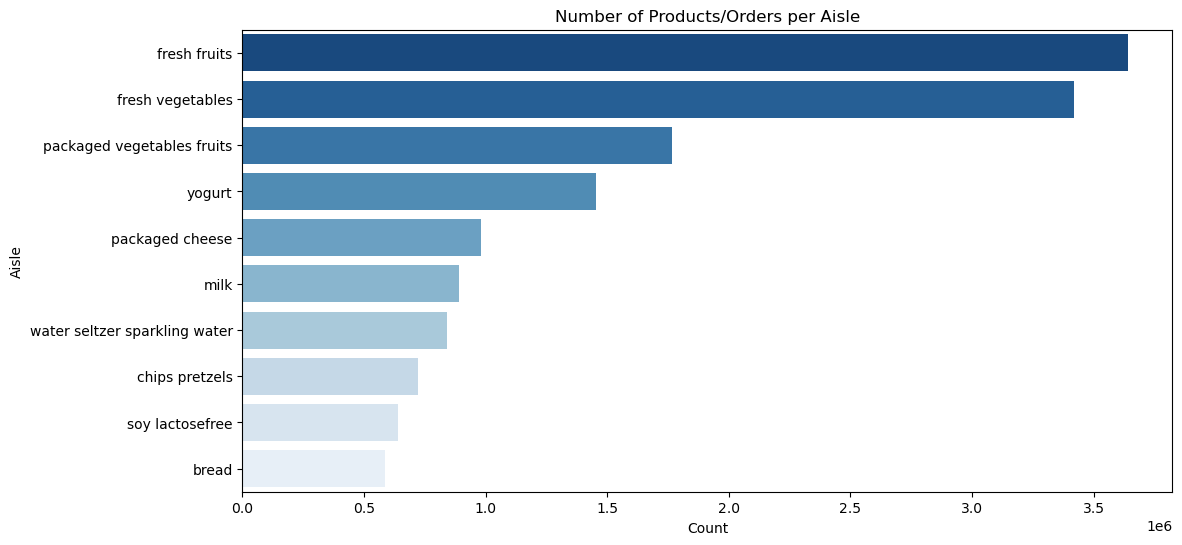

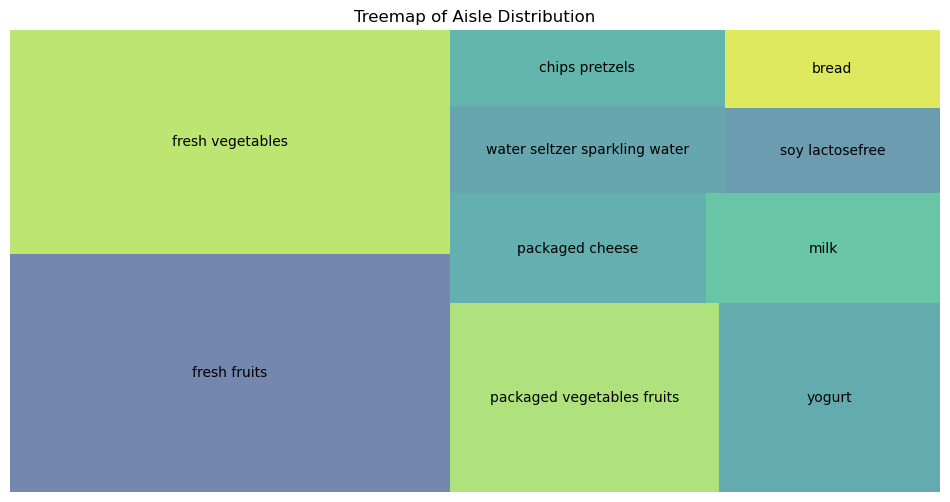

/var/folders/v0/302vhr4n5dnbjpj8077_jckw0000gn/T/ipykernel_98705/1937434531.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aisle_counts["aisle"], y=aisle_counts["count"], ax=ax1, palette="Blues_r")
/var/folders/v0/302vhr4n5dnbjpj8077_jckw0000gn/T/ipykernel_98705/1937434531.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(aisle_counts["aisle"], rotation=45, ha="right")


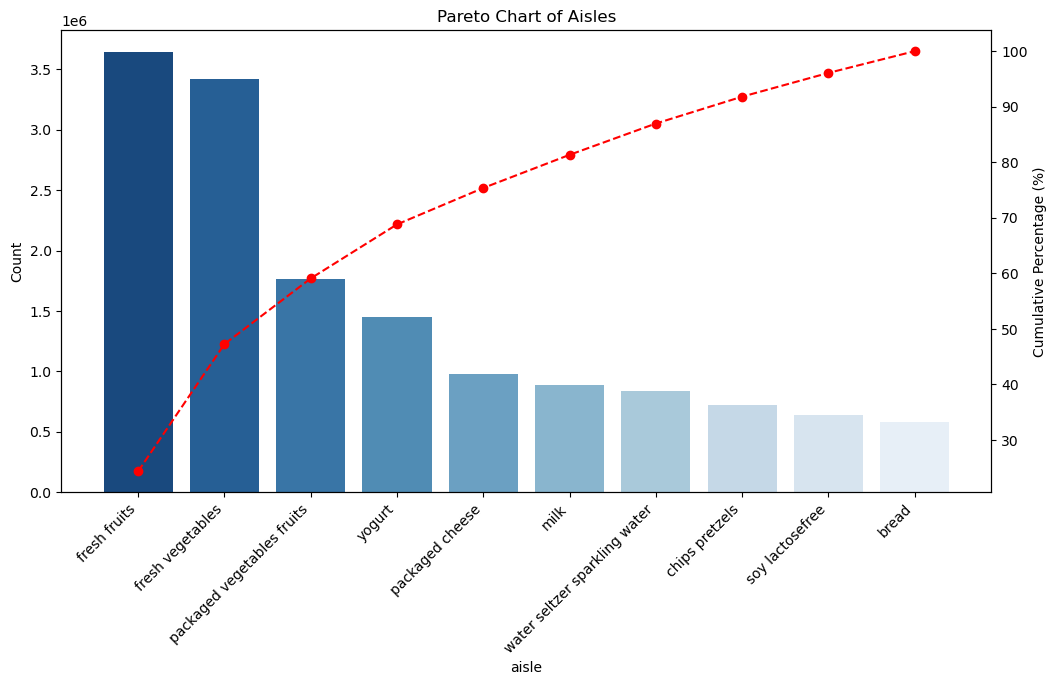

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns


# Plot Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x=aisle_counts["count"], y=aisle_counts["aisle"], palette="Blues_r")
plt.xlabel("Count")
plt.ylabel("Aisle")
plt.title("Number of Products/Orders per Aisle")
plt.show()

# Plot Treemap
import squarify

plt.figure(figsize=(12, 6))
squarify.plot(sizes=aisle_counts["count"], label=aisle_counts["aisle"], alpha=0.7)
plt.title("Treemap of Aisle Distribution")
plt.axis("off")
plt.show()

# Pareto Chart (Bar + Cumulative Line)
aisle_counts["cumulative_percentage"] = aisle_counts["count"].cumsum() / aisle_counts["count"].sum() * 100

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot
sns.barplot(x=aisle_counts["aisle"], y=aisle_counts["count"], ax=ax1, palette="Blues_r")
ax1.set_ylabel("Count")
ax1.set_xticklabels(aisle_counts["aisle"], rotation=45, ha="right")

# Line plot for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(aisle_counts["aisle"], aisle_counts["cumulative_percentage"], color="red", marker="o", linestyle="dashed")
ax2.set_ylabel("Cumulative Percentage (%)")

plt.title("Pareto Chart of Aisles")
plt.show()


In [9]:
department_counts = shopping_df.groupby('department_x').size().reset_index(name='count').sort_values(by = "count", ascending=False).head(10)
print(department_counts)

KeyError: 'department_x'

In [ ]:
best_produce = shopping_df[shopping_df['department_x'] == "produce"].groupby('product_name').size().reset_index(name='count').sort_values(by = "count", ascending=False).head(20)
print(best_produce)

                  product_name   count
119                     Banana  472565
113     Bag of Organic Bananas  379450
1181      Organic Strawberries  264683
845       Organic Baby Spinach  241921
992       Organic Hass Avocado  213584
831            Organic Avocado  176815
671                Large Lemon  152657
1510              Strawberries  142951
696                      Limes  140627
1116       Organic Raspberries  137057
1230      Organic Yellow Onion  113426
957             Organic Garlic  109778
1243          Organic Zucchini  104823
866        Organic Blueberries  100060
344             Cucumber Kirby   97315
951         Organic Fuji Apple   89632
1029             Organic Lemon   87746
30    Apple Honeycrisp Organic   85020
972     Organic Grape Tomatoes   84255
1438       Seedless Red Grapes   82689


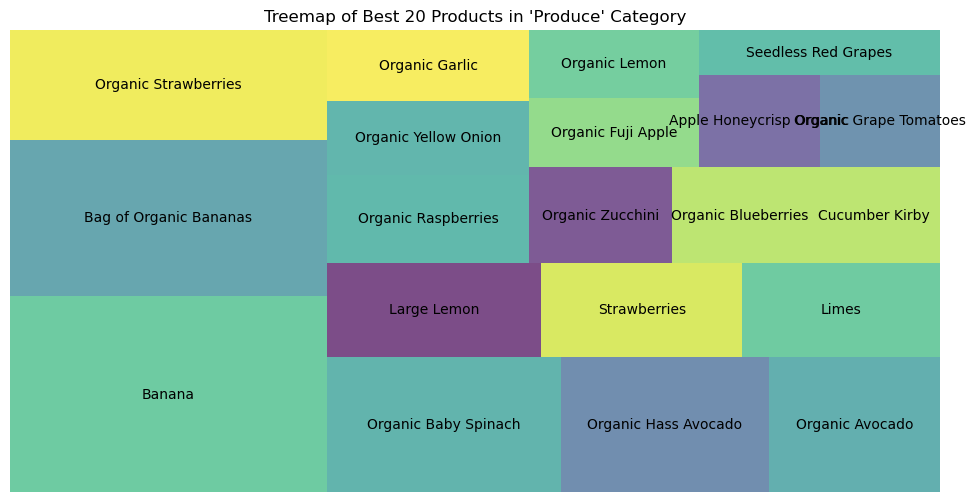

In [ ]:
plt.figure(figsize=(12, 6))
squarify.plot(sizes=best_produce["count"], label=best_produce["product_name"], alpha=0.7)
plt.title("Treemap of Best 20 Products in 'Produce' Category")
plt.axis("off")
plt.show()

In [11]:
shopping_with_time_df = pd.merge(shopping_df,orders_df, on = "order_id" , how = "inner").sort_values(by='order_id')
print(shopping_with_time_df)

          product_id                                       product_name  \
0              30035                                  Natural Sweetener   
1              17794                                            Carrots   
2               9327                                      Garlic Powder   
3              45918                                     Coconut Butter   
4               1819           All Natural No Stir Creamy Almond Butter   
...              ...                                                ...   
32434481        5020  Organic  Sweet & Salty Peanut Pretzel Granola ...   
32434480        7854                          Freeze Dried Mango Slices   
32434479        4600                    All Natural French Toast Sticks   
32434482       11352       Organic Mini Sandwich Crackers Peanut Butter   
32434488       45309                    Purple Carrot & blueberry Puffs   

          aisle_id  department_id department                   aisle  \
0               17         

In [14]:
print(shopping_with_time_df.groupby(["order_id", "order_dow"]).size().reset_index(name='count').sort_values(by = "count", ascending=False))

         order_id  order_dow  count
1469463   1564244          2    145
742844     790903          6    137
57588       61355          5    127
2791358   2970392          4    121
1944784   2069920          1    116
...           ...        ...    ...
111818     118997          1      1
111816     118995          5      1
1051402   1119343          6      1
817519     870412          6      1
2377643   2530309          6      1

[3214874 rows x 3 columns]
